# Projeto: Previsão do preço de casas




# Etapa 1: Importação das bibliotecas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

np.random.seed(101)
tf.random.set_seed(101)

In [2]:
sns.__version__

'0.13.2'

# Etapa 2: Importação da Base de dados

In [3]:
casas = pd.read_csv('MLs11a Previsão_preco_de_casas.csv') 
casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Etapa 3: Limpeza da base de dados

In [4]:
print(casas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Vamos ver como o preço da casa está mudando no tempo.

<Axes: xlabel='year,month'>

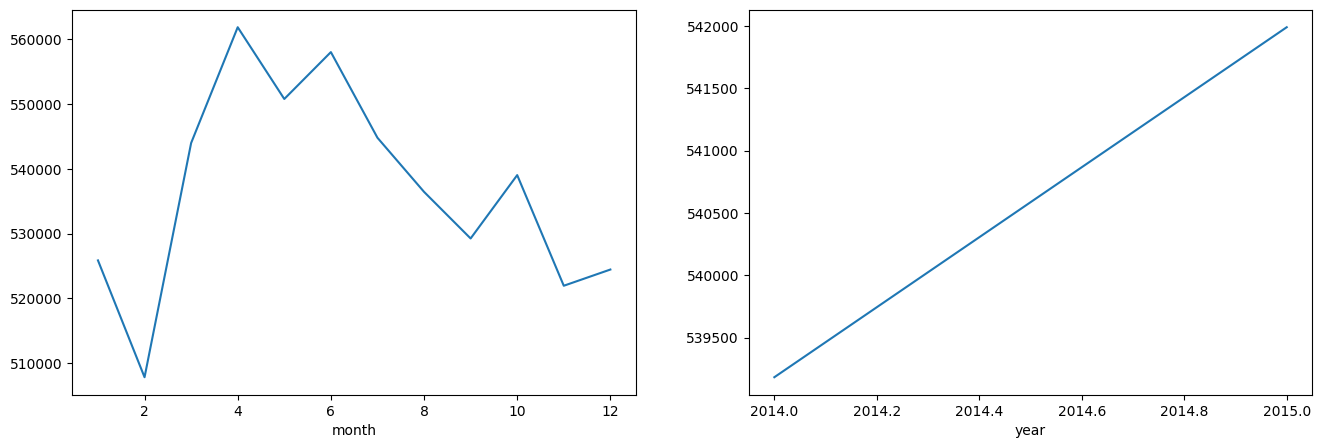

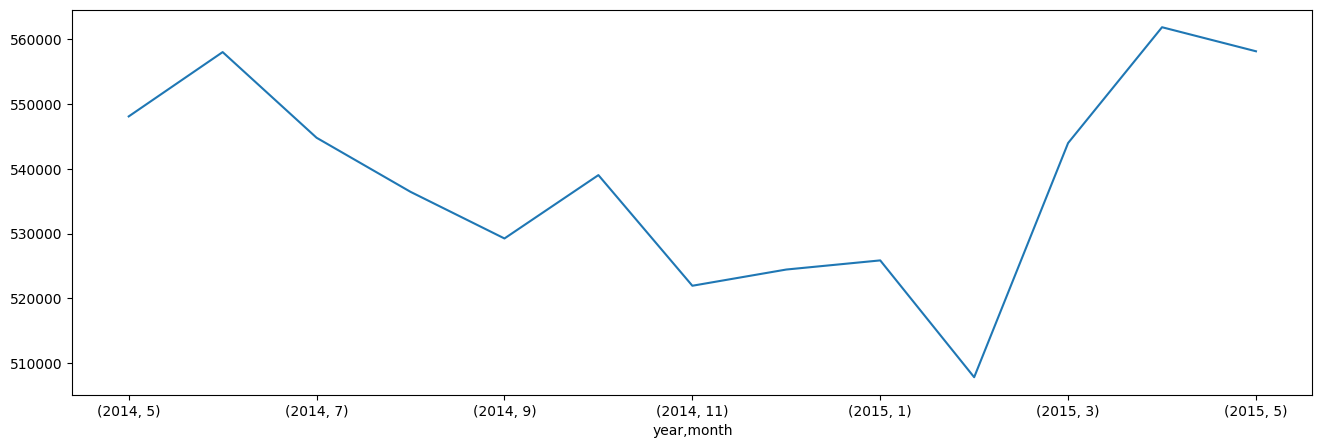

In [5]:

casas['date'] = pd.to_datetime(casas['date'])
casas['month'] = casas['date'].apply(lambda date:date.month)
casas['year'] = casas['date'].apply(lambda date:date.year)

fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
casas.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
casas.groupby('year').mean()['price'].plot()

fig2 = plt.figure(figsize=(16,5))
casas.groupby(['year', 'month'] ).mean()['price'].plot()


Vamos remover colunas desnecessárias, visto baixa relação do tempo

In [6]:
casas = casas.drop(labels=['id', 'date'], axis=1)
casas.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [7]:
matrix_corr = casas.corr()
print(matrix_corr["price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
zipcode         -0.053203
Name: price, dtype: float64


In [8]:
casas = casas.drop("zipcode", axis=1)
casas = casas.drop("month", axis=1)

# Etapa 4: Visualização da base de dados


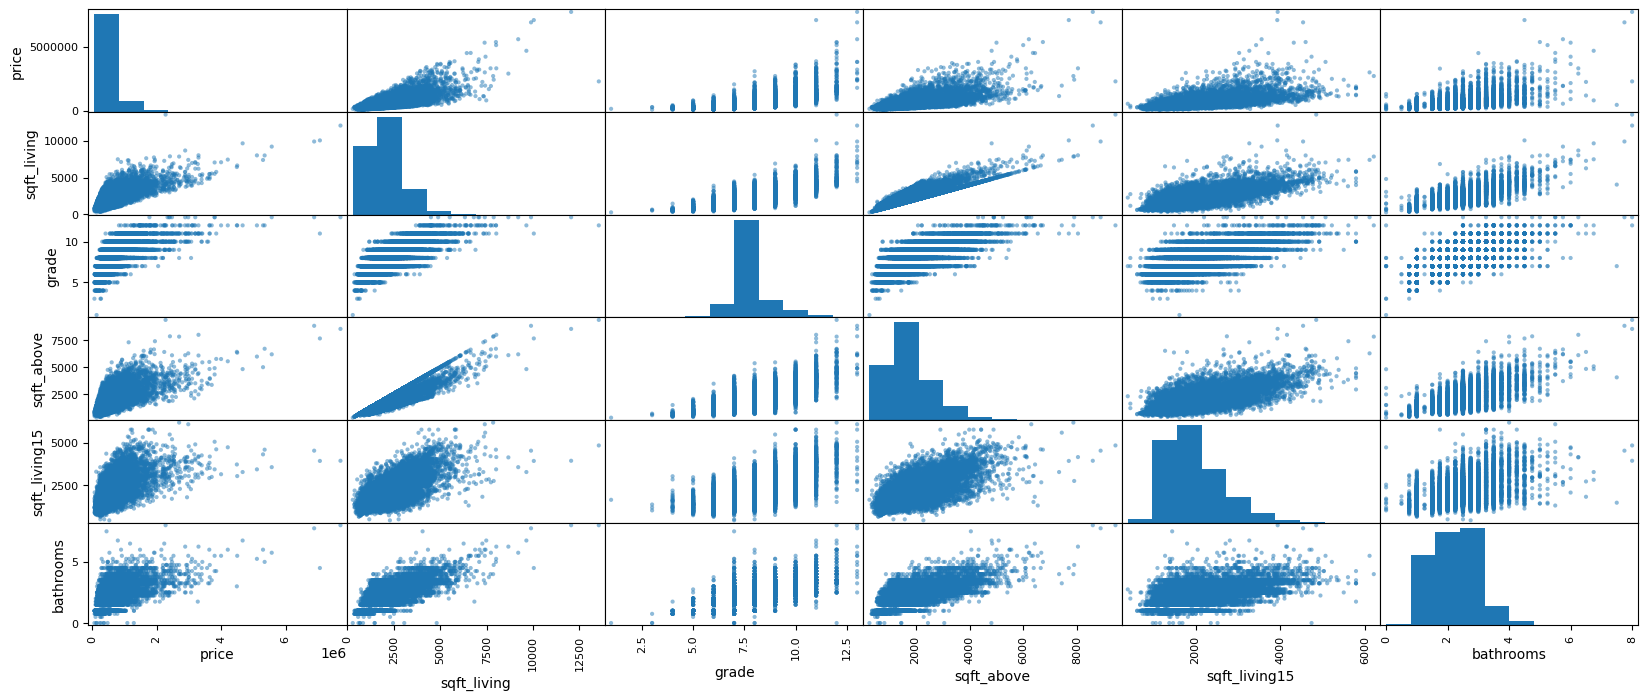

In [9]:
attr = ["price", "sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms"]
pd.plotting.scatter_matrix(casas[attr], figsize=(20,8) );

Como podemos ver, parece que existem alguns valores discrepantes possíveis para se preocupar. Então o que faremos é padronizar os dados quando criarmos nosso modelo para que não tenhamos que nos preocupar tanto com esse possível problema.



In [10]:
features = casas[attr]
features

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms
0,221900.0,1180,7,1180,1340,1.00
1,538000.0,2570,7,2170,1690,2.25
2,180000.0,770,6,770,2720,1.00
3,604000.0,1960,7,1050,1360,3.00
4,510000.0,1680,8,1680,1800,2.00
...,...,...,...,...,...,...
21608,360000.0,1530,8,1530,1530,2.50
21609,400000.0,2310,8,2310,1830,2.50
21610,402101.0,1020,7,1020,1020,0.75
21611,400000.0,1600,8,1600,1410,2.50


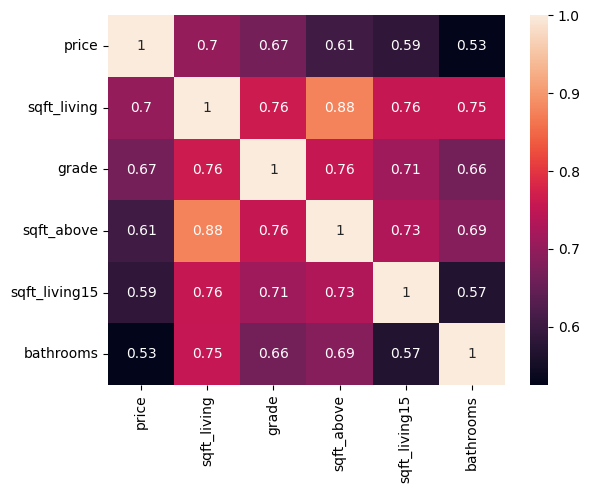

In [11]:
sns.heatmap(features.corr(), annot=True); #Matrix de correlação

# Etapa 5: Tratamento das base de dados

In [12]:
Y = features.iloc[:,:1].values # pegar apenas o último valor (cnt)
#Y = casas['price'].values
Y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [13]:
X = features.iloc[:,1:].values # pegar todos os valores menos o último (cnt)
#X = casas.drop('price',axis =1).values # ou simplesmente
X

array([[1.18e+03, 7.00e+00, 1.18e+03, 1.34e+03, 1.00e+00],
       [2.57e+03, 7.00e+00, 2.17e+03, 1.69e+03, 2.25e+00],
       [7.70e+02, 6.00e+00, 7.70e+02, 2.72e+03, 1.00e+00],
       ...,
       [1.02e+03, 7.00e+00, 1.02e+03, 1.02e+03, 7.50e-01],
       [1.60e+03, 8.00e+00, 1.60e+03, 1.41e+03, 2.50e+00],
       [1.02e+03, 7.00e+00, 1.02e+03, 1.02e+03, 7.50e-01]])

# Etapa 6: Configuração da base de treinamento e teste

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33) 

In [15]:
# Normalizar as features recursos nos ajudará a ver todas as variáveis ​​da mesma lente (mesma escala), 
# também ajudará nossos modelos a aprender mais rapidamente
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(float))
X_test = s_scaler.transform(X_test.astype(float))

# Etapa 7: Construção e treinamento do modelo

In [16]:
number_of_features = X.shape[1]
number_of_features

5

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(number_of_features, activation='relu', input_shape=(number_of_features,)))
model.add(Dense(number_of_features, activation='relu'))
model.add(Dense(number_of_features, activation='relu'))
model.add(Dense(number_of_features, activation='relu'))
model.add(Dense(1))
model.summary()

c:\tools\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126 (504.00 B)

 Trainable params: 126 (504.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='Adam',loss='mean_squared_error')

epochs_hist = model.fit(x = X_train,y = Y_train,
          validation_data=(X_test,Y_test),
          batch_size=128,epochs=200) # que tal deixar 400 épocas?

Epoch 1/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 436257030144.0000 - val_loss: 428884099072.0000
Epoch 2/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 436251885568.0000 - val_loss: 428863520768.0000
Epoch 3/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 436215775232.0000 - val_loss: 428732710912.0000
Epoch 4/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 436005994496.0000 - val_loss: 428164743168.0000
Epoch 5/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 435223658496.0000 - val_loss: 426530471936.0000
Epoch 6/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 433148362752.0000 - val_loss: 422843613184.0000
Epoch 7/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 428705415168.0000 - val_loss: 415793676288.0000
Epoch 8/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 420514430976.0000 - val_loss: 403856424960.0000
Epoch 9/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 407028301824.0000 - val_loss: 385521975296.0000
Epoch 10/20

# Etapa 8: Avaliação do modelo

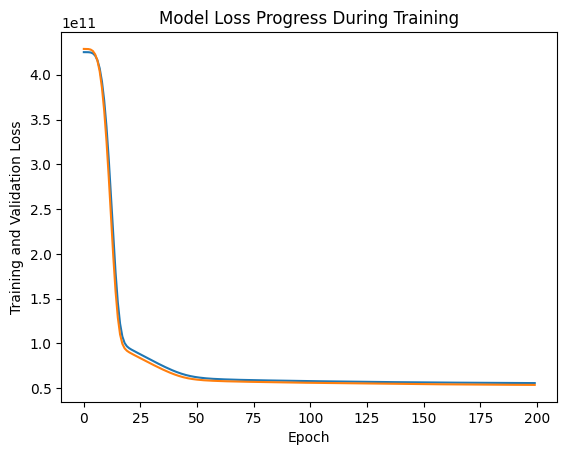

In [19]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss');

In [20]:
Y_predict = model.predict(X_test)
Y_predict

223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step


array([[366603.25],
       [565751.4 ],
       [530074.3 ],
       ...,
       [395305.03],
       [597040.9 ],
       [418308.62]], dtype=float32)

Text(0, 0.5, 'Valores de verdade')

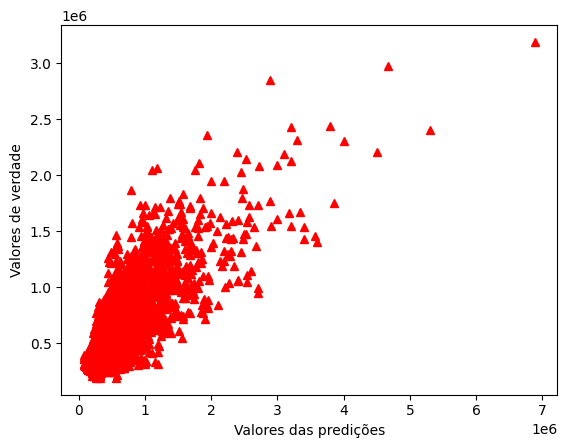

In [21]:
plt.plot(Y_test, Y_predict, "^", color ='r')
plt.xlabel('Valores das predições')
plt.ylabel('Valores de verdade')

In [22]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

mae=mean_absolute_error(Y_test, Y_predict)
#Valor 0 = previsões perfeitas

mse= mean_squared_error(Y_test, Y_predict)
# Penaliza os outliers, quanto maior os outliers maior será o erro

rmse = sqrt(mse)
# Provê estimativa de quanto os resíduos estão disperos

mape = mean_absolute_percentage_error(Y_test, Y_predict)
#Perda de regressão do erro percentual médio absoluto (MAPE).

r2 = r2_score(Y_test, Y_predict)
# (coefficient of determination) regression score function
# Fornece indicação de qualidade do modelo >>> Melhor valor é 1

r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - k - 1)
r2_ajustado
# R2_ajustado indica que existem variaveis "insignificantes".
# R-squared would penalize you for adding features which are not useful for predicting

variance = explained_variance_score(Y_test,Y_predict)

print("MAE: ", mae, 
      "\nMSE: ", mse, 
      "\nRMSE: ", rmse, 
      "\nMAPE: {:.2%}".format(mape), 
      "\nVarScore: {:.2%}".format(variance),
      "\nR2: {:.2%}".format(r2), 
      "\nR2 adj: {:.2%}".format(r2_ajustado)
      )


MAE:  151868.94086026217 
MSE:  53537720773.666985 
RMSE:  231382.19631956774 
MAPE: 31.84% 
VarScore: 60.97% 
R2: 60.96% 
R2 adj: 60.94%


C:\Users\CleitonGarcia\AppData\Local\Temp\ipykernel_16364\114314642.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

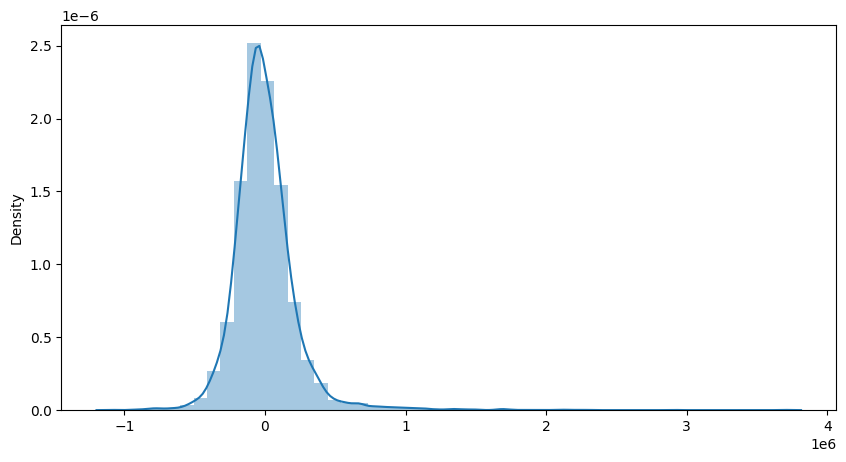

In [23]:
# visualizando as diferenças
fig = plt.figure(figsize=(10,5))
residuals = (Y_test - Y_predict)
sns.distplot(residuals)